# Number Of Tickets Sold vs. GDP



How does the GDP impact the popularity of movie genres?

In [1]:
import sys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr

data = pd.read_csv ('data.csv', index_col=0)

## Visual Display of Data


The following plot shows total movie ticket sales per year over our timeframe of interest (1995 to 2018).

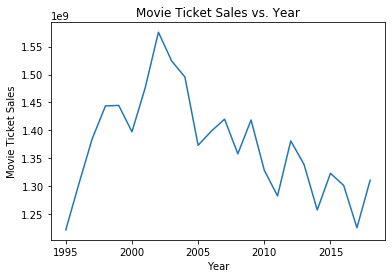

In [9]:
#Graph of Ticket Sales 

tickets_raw = pd.DataFrame(data["Total Tickets"])
tickets = np.zeros(24)
x = 0
for value in tickets_raw.iterrows():
    tickets[x] = tickets_raw.iloc(0)[x]
    x+=1

plt.plot(range(1995,2019),tickets)
plt.xlabel("Year")
plt.ylabel("Movie Ticket Sales")
plt.title("Movie Ticket Sales vs. Year")
plt.show()

The following plot shows the percent growth in the United States GDP per year over our timeframe of interest (1995 to 2018).

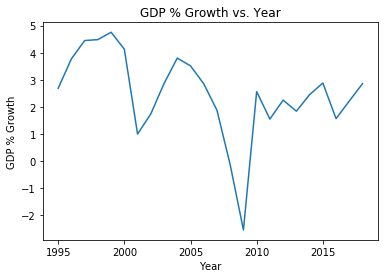

In [10]:
#Graph of GDP

gdp = data["GDP % Growth"]
g = np.zeros(24)
count = 0
for x in gdp:
    g[count] = x
    count+=1

plt.plot(range(1995,2019),g)
plt.xlabel('Year')
plt.ylabel('GDP % Growth')
plt.title("GDP % Growth vs. Year")
plt.show()

## Model of Relationships

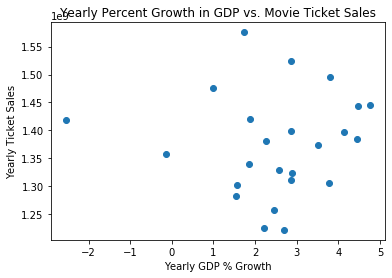

In [11]:
model = LinearRegression().fit(data[["GDP % Growth"]], data[["Total Tickets"]])

cor = model.coef_[0]
intercept=model.intercept_

plt.scatter(data[["GDP % Growth"]], data[["Total Tickets"]])
plt.ylabel("Yearly Ticket Sales")
plt.xlabel("Yearly GDP % Growth")
plt.title("Yearly Percent Growth in GDP vs. Movie Ticket Sales")
plt.show()

## Finding r<sup>2</sup>

In [15]:
rsq = model.score(data[["GDP % Growth"]],data["Total Tickets"])
print("R^2 Value of Correlation: ", rsq)

R^2 Value of Correlation:  0.001367271152202587


The low r<sup>2</sup> value indicatest that there is not a high correlation between the GDP changes and the number of movie tickets sold.

## Evaluation Of Significance

In [16]:
spearman = spearmanr(data["GDP % Growth"], data[["Total Tickets"]]).correlation 
print("Spearman Correlation Value: ",spearman)

Spearman Correlation Value:  0.17043478260869566


The Spearman Correlation is also very weak indicating that GDP changes do not have a direct impact on the number of movie tickets sold. 